# 🚀 𝐃𝐚𝐲 𝟐𝟎: 𝐇𝐚𝐧𝐝𝐥𝐢𝐧𝐠 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞𝐝 𝐃𝐚𝐭𝐚 – 𝐒𝐌𝐎𝐓𝐄, 𝐂𝐥𝐚𝐬𝐬 𝐖𝐞𝐢𝐠𝐡𝐭𝐬, 𝐓𝐡𝐫𝐞𝐬𝐡𝐨𝐥𝐝𝐢𝐧𝐠 | 𝟑𝟎-𝐃𝐚𝐲 𝐌𝐋 𝐂𝐡𝐚𝐥𝐥𝐞𝐧𝐠𝐞



 Many real-world datasets have an unequal distribution of classes, leading to biased models. We explore three techniques to handle class imbalance:



 ✅ SMOTE (Synthetic Minority Over-sampling Technique) – Creates synthetic samples for the minority class.

 ✅ Class Weights – Assigns higher weights to the minority class to balance training.

 ✅ Thresholding – Adjusts the decision threshold to optimize model performance.



## 🔹 𝐊𝐞𝐲 𝐓𝐚𝐤𝐞𝐚𝐰𝐚𝐲𝐬

 ✅ SMOTE creates synthetic data to balance the dataset.

 ✅ Class Weights make the model more sensitive to the minority class.

 ✅ Thresholding helps control precision and recall trade-offs.


In [1]:
!pip install imbalanced-learn

In [2]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\Lenovo\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


## 1️⃣ SMOTE Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification


In [3]:
# Generate imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Apply SMOTE to balance dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [7]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       262
           1       0.72      0.74      0.73        38

    accuracy                           0.93       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.93      0.93      0.93       300



## 2️⃣ Using Class Weights in Model Training

In [8]:
# Train model with class weights
clf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Predict and evaluate
y_pred_weighted = clf_weighted.predict(X_test)
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       262
           1       0.85      0.61      0.71        38

    accuracy                           0.94       300
   macro avg       0.90      0.79      0.84       300
weighted avg       0.93      0.94      0.93       300



## 3️⃣ Thresholding for Better Predictions

In [10]:
from sklearn.metrics import precision_recall_curve

In [11]:
# Get probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

In [12]:
# Adjust threshold
threshold = 0.3  # Lower threshold for better recall
y_pred_thresholded = (y_probs > threshold).astype(int)

In [13]:
# Evaluate
print(classification_report(y_test, y_pred_thresholded))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       262
           1       0.55      0.82      0.66        38

    accuracy                           0.89       300
   macro avg       0.76      0.86      0.80       300
weighted avg       0.92      0.89      0.90       300



## 📊 Visualization: Before & After SMOTE

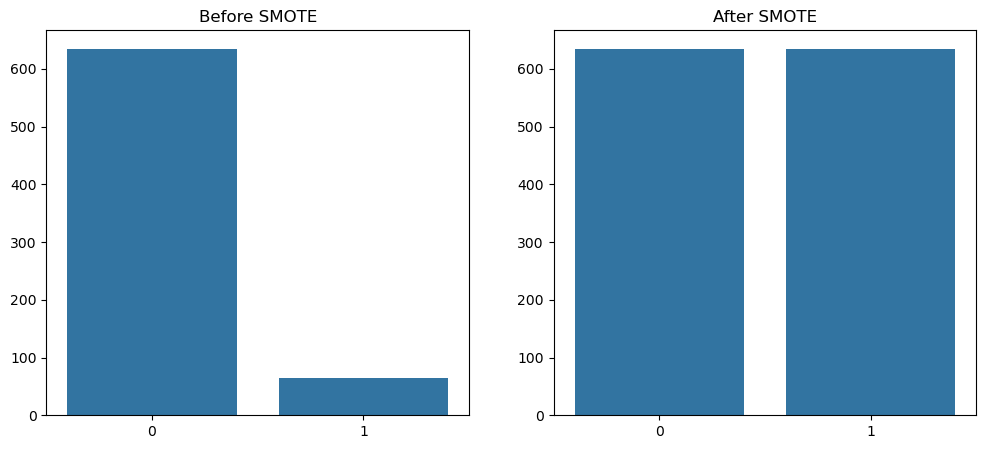

In [14]:
from collections import Counter
import seaborn as sns

# Count before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), ax=ax[0])
ax[0].set_title('Before SMOTE')

sns.barplot(x=list(Counter(y_train_resampled).keys()), y=list(Counter(y_train_resampled).values()), ax=ax[1])
ax[1].set_title('After SMOTE')

plt.show()